In [1]:
import os
import scipy.io
import matplotlib.pyplot as plt

In [2]:
sub_dirs = list(filter(lambda x: "subject" in x, os.listdir(path="cipic-hrtf-database-master/standard_hrir_database/")))
sub = {i[len(i)-3:len(i)]: i for i in sub_dirs}
sub, len(sub)

({'003': 'subject_003',
  '008': 'subject_008',
  '009': 'subject_009',
  '010': 'subject_010',
  '011': 'subject_011',
  '012': 'subject_012',
  '015': 'subject_015',
  '017': 'subject_017',
  '018': 'subject_018',
  '019': 'subject_019',
  '020': 'subject_020',
  '021': 'subject_021',
  '027': 'subject_027',
  '028': 'subject_028',
  '033': 'subject_033',
  '040': 'subject_040',
  '044': 'subject_044',
  '048': 'subject_048',
  '050': 'subject_050',
  '051': 'subject_051',
  '058': 'subject_058',
  '059': 'subject_059',
  '060': 'subject_060',
  '061': 'subject_061',
  '065': 'subject_065',
  '119': 'subject_119',
  '124': 'subject_124',
  '126': 'subject_126',
  '127': 'subject_127',
  '131': 'subject_131',
  '133': 'subject_133',
  '134': 'subject_134',
  '135': 'subject_135',
  '137': 'subject_137',
  '147': 'subject_147',
  '148': 'subject_148',
  '152': 'subject_152',
  '153': 'subject_153',
  '154': 'subject_154',
  '155': 'subject_155',
  '156': 'subject_156',
  '158': 'subjec

In [3]:
def read_subject_mat(subject_num):
    path = "cipic-hrtf-database-master/standard_hrir_database/"
    subject = f"subject_{subject_num}/"
    f = scipy.io.loadmat(path + subject + "hrir_final.mat")
    """ for i in f:
        print(i, f[i]) """
    return f

In [4]:
def read_custom_mat(path):
    f = scipy.io.loadmat(path)
    """ for i in f:
        print(i, f[i]) """
    return f

In [5]:
class Subject:
    def __init__(self, id, onR, onL, itd, hrir_r, hrir_l):
        self.id = id
        self.onR = onR
        self.onL = onL
        self.itd = itd
        self.hrir_r = hrir_r
        self.hrir_l = hrir_l

In [6]:
def assign_subject(subject_num):
    subject = read_subject_mat(subject_num)
    return Subject(subject_num, subject['OnR'], subject['OnL'], subject['ITD'], subject["hrir_r"], subject['hrir_l'])

In [7]:
anthro_mat = read_custom_mat("cipic-hrtf-database-master/anthropometry/anthro.mat")
'''
Set of 27 anthropometric readings
17 - head & 10 - torso
'''

'\nSet of 27 anthropometric readings\n17 - head & 10 - torso\n'

In [8]:
'''
Elevations were uniformly sampled in 5.625 deg, from -45 deg to 230.625 deg
'''

'''
Arrays ITD, hrir_r, hrir_l, OnR & OnL has 25 lists (25 different azimuths) (left to right).
Each list has 50 readings (50 different elevations) (top to bottom) at approx 5 deg angular increment
'''

'''
len(sub.hrir) = 25
len(sub.hrir[0]) = 50
len(sub.hrir[0][0]) = 200

total readings per HRIR = 25 * 50 * 200 = 2,50,000
'''

subject_003 = assign_subject(subject_num="003")
print(subject_003.hrir_r[0][0])


[-3.11875994e-08  5.98625868e-07 -3.89598115e-06  5.84628777e-07
 -3.84821094e-05 -1.45932398e-04 -7.94875472e-05 -4.40298121e-04
 -8.17199305e-04 -5.26990740e-04 -1.66426938e-03 -2.00059359e-03
 -1.77334573e-03 -1.96503132e-03 -1.92667238e-03 -2.46048213e-03
 -2.63203776e-03 -2.31107649e-03 -2.03720585e-03 -2.41328781e-03
 -1.93626005e-03 -2.51413717e-03 -1.65110780e-03 -1.31566572e-03
 -3.39586001e-03 -3.45370787e-03 -2.07106397e-03 -2.60944448e-03
 -3.14782024e-03 -2.18415546e-03 -1.54634048e-03 -2.03580729e-03
 -3.09895753e-03 -1.92612088e-03 -1.75981642e-03 -4.51178893e-03
 -6.48466007e-04 -3.26738089e-03 -3.38295088e-03 -2.67173882e-04
 -3.34297922e-03 -2.19973196e-03 -5.27779061e-04 -4.54647141e-03
 -5.05488039e-03 -1.84220198e-03 -4.12792530e-03 -2.43910739e-03
 -1.77752728e-03 -3.20836026e-03 -1.83460985e-03  1.27693523e-02
  7.52272564e-02  1.32032669e-01  9.97185761e-02  8.08290410e-02
  8.81161385e-02  1.54263563e-02 -4.13859717e-02 -5.46936406e-02
 -8.77618021e-02 -8.19669

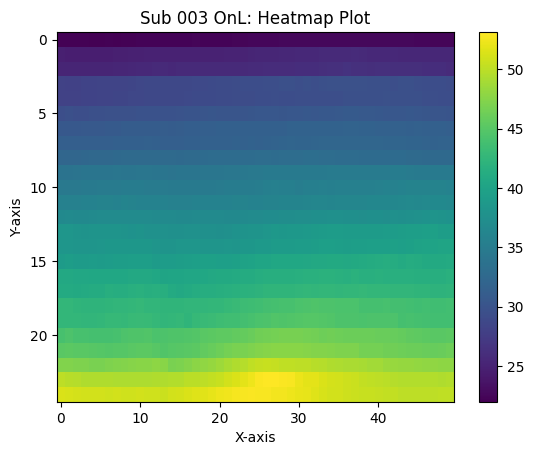

In [12]:
# Assuming OnL is a 2D array
plt.imshow(subject_003.onL, cmap='viridis', aspect='auto')
plt.colorbar()
plt.title('Sub 003 OnL: Heatmap Plot')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()
